In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

castro cl
punta arenas cl
provideniya ru
japura br
sentyabrskiy ru
nizhniy tsasuchey ru
waghai in
saint-augustin ca
dukat ru
hithadhoo mv
hobart au
vaini to
te anau nz
ushuaia ar
mocuba mz
ushuaia ar
soria es
castro cl
shibetsu jp
norman us
ushuaia ar
tuktoyaktuk ca
roald no
aykhal ru
east london za
attawapiskat ca
kapaa us
tibacuy co
belushya guba ru
vaini to
busselton au
oranjemund na
tasiilaq gl
hami cn
wahran dz
mehamn no
busselton au
hamilton bm
chokurdakh ru
rikitea pf
chokurdakh ru
hermanus za
diamantino br
vao nc
ust-nera ru
albany au
kodiak us
acarau br
sorvag fo
kamenskoye ru
busselton au
kuche cn
barentsburg sj
asau tv
pingliang cn
vardo no
kathmandu np
tumannyy ru
rikitea pf
new norfolk au
okha ru
manono cd
ratnagiri in
ushuaia ar
dunedin nz
fortuna us
tubruq ly
upernavik gl
tokonou gn
thanh hoa vn
new norfolk au
taolanaro mg
atuona pf
rikitea pf
avarua ck
albany au
ushuaia ar
albany au
meyungs pw
rikitea pf
saint-philippe re
sechura pe
mar del plata ar
ushuaia ar
palauig p

bredasdorp za
tuktoyaktuk ca
hope ca
ribeira grande pt
boende cd
grants us
brigham city us
along in
saint-philippe re
tiznit ma
mataura pf
leningradskiy ru
rikitea pf
londrina br
carnarvon au
abu dhabi ae
punta arenas cl
cayenne gf
saint george bm
hobart au
ushuaia ar
buraydah sa
kaitangata nz
cape town za
norman wells ca
kapaa us
butaritari ki
nioro ml
rawson ar
punta arenas cl
rikitea pf
puerto ayora ec
port alfred za
thompson ca
te anau nz
hilo us
rikitea pf
rikitea pf
cherskiy ru
comodoro rivadavia ar
gimli ca
jamestown sh
bluff nz
mar del plata ar
port-gentil ga
longyearbyen sj
vanavara ru
virginia beach us
saint-philippe re
sri aman my
soyo ao
lerwick gb
shatrovo ru
chuy uy
gamba ga
albany au
kodiak us
doka sd
saint-francois gp
jamestown sh
sioux lookout ca
kavieng pg
tuktoyaktuk ca
ust-koksa ru
krasnoselkup ru
codrington ag
yenagoa ng
chuy uy
lompoc us
angoche mz
punta arenas cl
vallenar cl
meulaboh id
klaksvik fo
dunedin nz
new norfolk au
puerto ayora ec
albany au
hasaki jp
pue

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | castro
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | provideniya
Processing Record 4 of Set 13 | japura
Processing Record 5 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 13 | nizhniy tsasuchey
Processing Record 7 of Set 13 | waghai
Processing Record 8 of Set 13 | saint-augustin
Processing Record 9 of Set 13 | dukat
Processing Record 10 of Set 13 | hithadhoo
Processing Record 11 of Set 13 | hobart
Processing Record 12 of Set 13 | vaini
Processing Record 13 of Set 13 | te anau
Processing Record 14 of Set 13 | ushuaia
Processing Record 15 of Set 13 | mocuba
Processing Record 16 of Set 13 | soria
Processing Record 17 of Set 13 | shibetsu
Processing Record 18 of Set 13 | norman
Processing Record 19 of Set 13 | tuktoyaktuk
Processing Record 20 of Set 13 | roald
Processing Record 21 of Set 13 | aykhal
Processing Record 22 of Set 13 | east london
Processing Record 23 of Set 13 | attawapiskat
City n

Processing Record 32 of Set 16 | saint george
Processing Record 33 of Set 16 | port elizabeth
Processing Record 34 of Set 16 | havoysund
Processing Record 35 of Set 16 | behbahan
Processing Record 36 of Set 16 | brattvag
Processing Record 37 of Set 16 | izhmorskiy
Processing Record 38 of Set 16 | mount gambier
Processing Record 39 of Set 16 | geraldton
Processing Record 40 of Set 16 | tual
Processing Record 41 of Set 16 | port blair
Processing Record 42 of Set 16 | quatre cocos
Processing Record 43 of Set 16 | trairi
Processing Record 44 of Set 16 | goure
Processing Record 45 of Set 16 | bredasdorp
Processing Record 46 of Set 16 | yellowknife
Processing Record 47 of Set 16 | eyl
Processing Record 48 of Set 16 | muyezerskiy
Processing Record 49 of Set 16 | kortkeros
Processing Record 50 of Set 16 | quetta
Processing Record 1 of Set 17 | jingdezhen
Processing Record 2 of Set 17 | louisbourg
City not found. Skipping...
Processing Record 3 of Set 17 | khatanga
Processing Record 4 of Set 17

Processing Record 14 of Set 20 | tabuk
Processing Record 15 of Set 20 | novosheshminsk
Processing Record 16 of Set 20 | vanimo
Processing Record 17 of Set 20 | praia da vitoria
Processing Record 18 of Set 20 | abu dhabi
Processing Record 19 of Set 20 | tautira
Processing Record 20 of Set 20 | beloha
Processing Record 21 of Set 20 | vrede
Processing Record 22 of Set 20 | abay
Processing Record 23 of Set 20 | ornskoldsvik
Processing Record 24 of Set 20 | tagnanan
Processing Record 25 of Set 20 | vila franca do campo
Processing Record 26 of Set 20 | takoradi
Processing Record 27 of Set 20 | batouri
Processing Record 28 of Set 20 | high level
Processing Record 29 of Set 20 | jackson
Processing Record 30 of Set 20 | ozgon
City not found. Skipping...
Processing Record 31 of Set 20 | jiddah
City not found. Skipping...
Processing Record 32 of Set 20 | cidreira
Processing Record 33 of Set 20 | saldanha
Processing Record 34 of Set 20 | tabialan
City not found. Skipping...
Processing Record 35 of

Processing Record 50 of Set 23 | hit
Processing Record 1 of Set 24 | port lincoln
Processing Record 2 of Set 24 | maniwaki
Processing Record 3 of Set 24 | itarema
Processing Record 4 of Set 24 | vestmannaeyjar
Processing Record 5 of Set 24 | bo rai
Processing Record 6 of Set 24 | sorland
Processing Record 7 of Set 24 | adre
Processing Record 8 of Set 24 | gazanjyk
Processing Record 9 of Set 24 | jizan
Processing Record 10 of Set 24 | caraguatatuba
Processing Record 11 of Set 24 | dudinka
Processing Record 12 of Set 24 | alofi
Processing Record 13 of Set 24 | khvoynaya
Processing Record 14 of Set 24 | fremont
Processing Record 15 of Set 24 | saint-joseph
Processing Record 16 of Set 24 | george
Processing Record 17 of Set 24 | marsabit
Processing Record 18 of Set 24 | paris
Processing Record 19 of Set 24 | monroe
Processing Record 20 of Set 24 | sakakah
Processing Record 21 of Set 24 | bushehr
Processing Record 22 of Set 24 | gulu
Processing Record 23 of Set 24 | alugan
Processing Record

In [13]:
len(city_data)

568

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,55.67,75,0,2.28,BR,2021-04-28 00:11:50
1,Punta Arenas,-53.1500,-70.9167,42.80,87,90,10.36,CL,2021-04-28 00:08:01
2,Provideniya,64.3833,-173.3000,32.00,86,75,13.42,RU,2021-04-28 00:11:51
3,Japura,-0.3167,102.3500,73.60,97,89,0.63,ID,2021-04-28 00:11:51
4,Nizhniy Tsasuchey,50.5167,115.1333,31.15,41,38,19.17,RU,2021-04-28 00:11:52
5,Waghai,20.7667,73.4833,78.28,64,1,1.23,IN,2021-04-28 00:11:52
6,Saint-Augustin,51.2260,-58.6502,36.54,99,100,4.79,CA,2021-04-28 00:11:52
7,Dukat,62.5500,155.5500,25.79,68,3,3.80,RU,2021-04-28 00:11:53
8,Hithadhoo,-0.6000,73.0833,82.17,65,99,2.10,MV,2021-04-28 00:11:53
9,Hobart,-42.8794,147.3294,62.01,76,75,6.91,AU,2021-04-28 00:07:28


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order] 

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2021-04-28 00:11:50,-24.7911,-50.0119,55.67,75,0,2.28
1,Punta Arenas,CL,2021-04-28 00:08:01,-53.1500,-70.9167,42.80,87,90,10.36
2,Provideniya,RU,2021-04-28 00:11:51,64.3833,-173.3000,32.00,86,75,13.42
3,Japura,ID,2021-04-28 00:11:51,-0.3167,102.3500,73.60,97,89,0.63
4,Nizhniy Tsasuchey,RU,2021-04-28 00:11:52,50.5167,115.1333,31.15,41,38,19.17
...,...,...,...,...,...,...,...,...,...
563,Santa Isabel Do Rio Negro,BR,2021-04-28 00:15:15,-0.4139,-65.0192,73.69,97,53,2.21
564,Ugoofaaru,MV,2021-04-28 00:15:15,5.6667,73.0000,83.35,73,91,6.44
565,Baherden,TM,2021-04-28 00:15:15,38.4362,57.4316,73.02,46,65,4.32
566,Garowe,SO,2021-04-28 00:15:16,8.4054,48.4845,78.53,72,53,10.49


In [18]:
# Create the output file (CSV).
output_data_file = "/Users/Daniel/Desktop/Module_Challenges/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

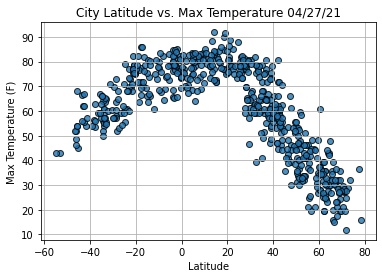

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

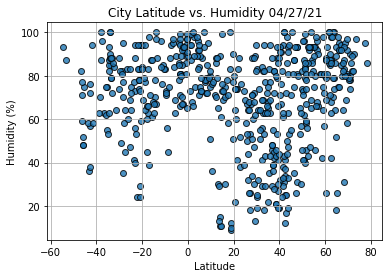

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

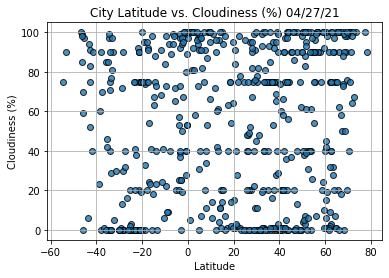

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

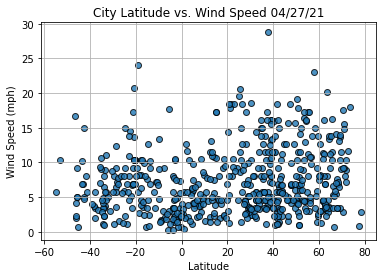

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Provideniya,RU,2021-04-28 00:11:51,64.3833,-173.3000,32.00,86,75,13.42
4,Nizhniy Tsasuchey,RU,2021-04-28 00:11:52,50.5167,115.1333,31.15,41,38,19.17
5,Waghai,IN,2021-04-28 00:11:52,20.7667,73.4833,78.28,64,1,1.23
6,Saint-Augustin,CA,2021-04-28 00:11:52,51.2260,-58.6502,36.54,99,100,4.79
7,Dukat,RU,2021-04-28 00:11:53,62.5500,155.5500,25.79,68,3,3.80
...,...,...,...,...,...,...,...,...,...
562,Araouane,ML,2021-04-28 00:15:14,18.9048,-3.5265,91.65,10,14,9.44
564,Ugoofaaru,MV,2021-04-28 00:15:15,5.6667,73.0000,83.35,73,91,6.44
565,Baherden,TM,2021-04-28 00:15:15,38.4362,57.4316,73.02,46,65,4.32
566,Garowe,SO,2021-04-28 00:15:16,8.4054,48.4845,78.53,72,53,10.49


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Provideniya,RU,2021-04-28 00:11:51,64.3833,-173.3000,32.00,86,75,13.42
4,Nizhniy Tsasuchey,RU,2021-04-28 00:11:52,50.5167,115.1333,31.15,41,38,19.17
5,Waghai,IN,2021-04-28 00:11:52,20.7667,73.4833,78.28,64,1,1.23
6,Saint-Augustin,CA,2021-04-28 00:11:52,51.2260,-58.6502,36.54,99,100,4.79
7,Dukat,RU,2021-04-28 00:11:53,62.5500,155.5500,25.79,68,3,3.80


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

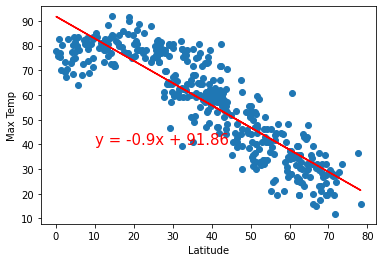

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

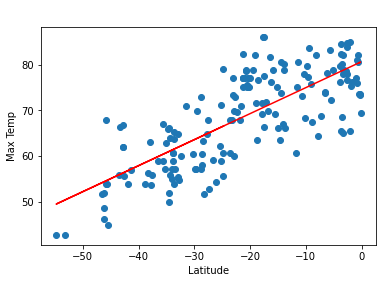

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

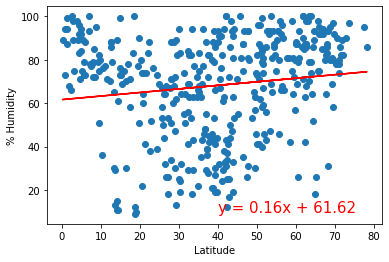

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

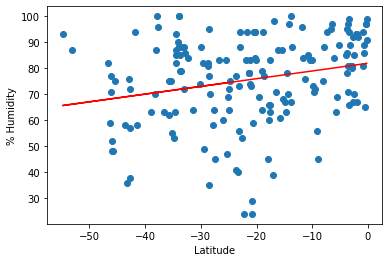

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity", '% Humidity',(-50,15))

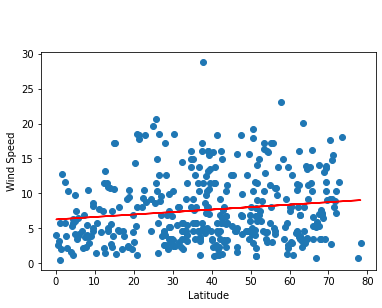

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

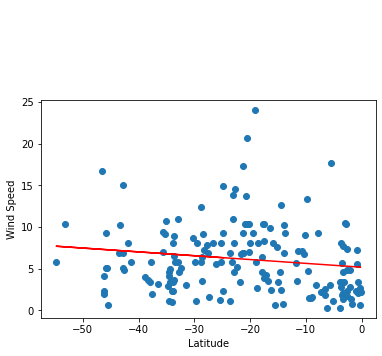

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))